# Fashion MNIST

## References
- https://www.kaggle.com/datasets/zalando-research/fashionmnist
- https://github.com/zalandoresearch/fashion-mnist
- https://keras.io/api/datasets/fashion_mnist/

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

print(f'Numpy v{np.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'TensorFlow v{tf.__version__}')

2023-08-28 18:00:52.375993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Numpy v1.23.5
Pandas v2.0.3
TensorFlow v2.13.0


## Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

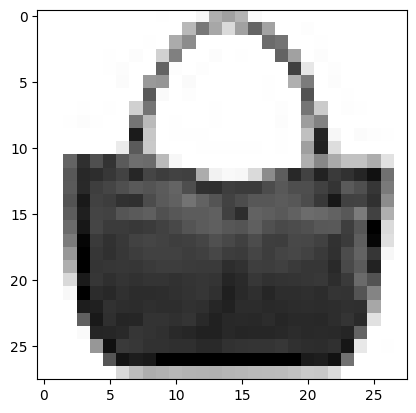

In [3]:
plt.imshow(x_train[100], cmap='Greys');

## Transform the data

It reshapes the 3D array in a 2D version where the columns are the pixels of the image flattened in 1 array.

For the labels, it applies one-hot encoding.

In [4]:
x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

## Model creation

In [6]:
model = tf.keras.Sequential(
    name='ZalandoFashionMNIST',
    layers=[
        tf.keras.layers.Input(shape=x_train.shape[1]),
        tf.keras.layers.Dense(30, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "ZalandoFashionMNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 24380 (95.23 KB)
Trainable params: 24380 (95.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [7]:
history = model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=False)

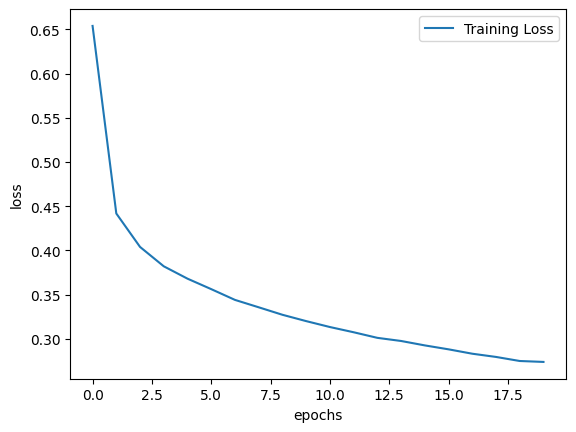

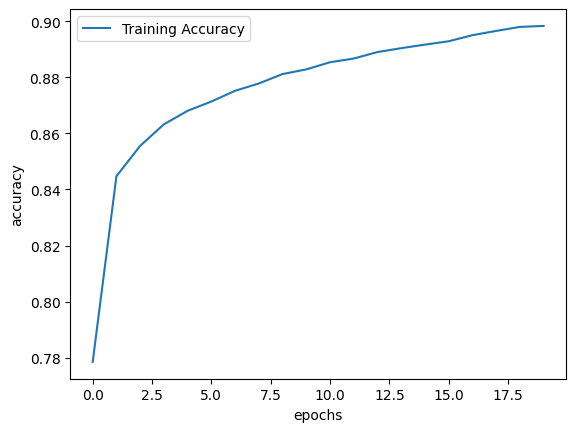

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show();

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show();

## Evaluation

In [9]:
la = model.evaluate(x_test, y_test, verbose=False)

## Prediction

In [10]:
y_probs = model.predict(x_test)

313/313 [==============================] - 0s 636us/step


In [11]:
y_pred = np.argmax(y_probs, axis=1)

In [12]:
classes = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Predicted: Trouser
Actual: Trouser


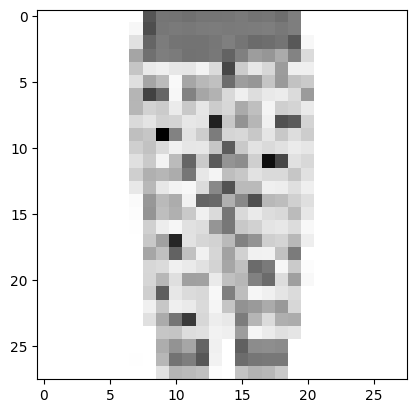

In [13]:
image = 2111
print(f'Predicted: {classes[y_pred[image]]}')
print(f'Actual: {classes[np.argmax(y_test[image])]}')
plt.imshow(x_test[image].reshape(28, 28), cmap='Greys');